<img src="./images/qinsti.png" align="left" alt="drawing" width="100"/>
<br><br>
<div align="left">
    <h2>Text Preprocessing-Demo</h2>
</div>



## Context

The purpose of this notebook is to demonstrate a few text processsing tasks


## Load Spacy Language Model

`Spacy` library in Python has a lot of useful modules for NLP tasks. It has many preprocessing modules and operates with many of the popular deep learning 
frameworks

In [1]:
import spacy
import pandas as pd
import numpy as np


spaCy101: https://spacy.io/usage/spacy-101#whats-spacy

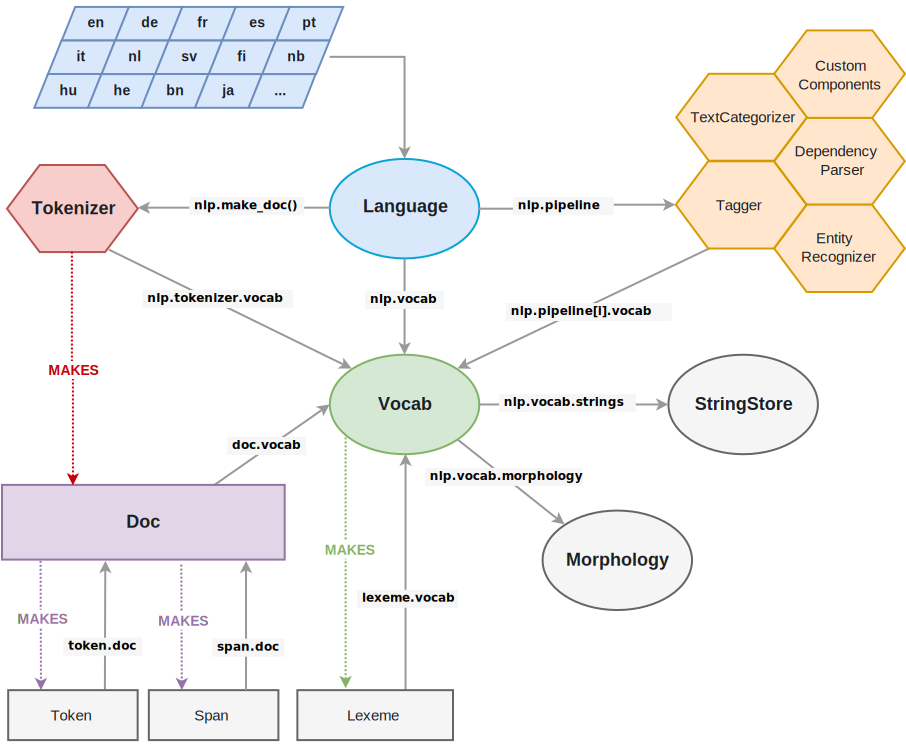

In [2]:
from IPython.core.display import SVG
SVG(filename='SpacyArchitecture.svg')

## Load News Data

The dataset comprises sample news item from the financial domain. These news items are related to *commodity arbitrage* and *loans* related items 

In [3]:
with open("./data/sample-news-item.txt","r") as f:
     news_item = "".join(f.readlines())
news_item

"TAIPEI, April 15 (Reuter) - Taiwan's money rates finished\nmixed on Monday, dealers expecting overnight to rise further\namid current bullish stock market and income tax payments.\n    Overnight ended at 6.134 percent against Saturday's 5.949,\nwhile 30-day commercial paper fell to 7.00 from 7.10-7.15.\n    Though Taiwan share prices hit a new 11-month high on\nMonday, attracting liquidity into the stock market, bond traders\ndid not expect significantly tighter conditions as the central\nbank monetary policy remains relaxed.\n"

### Spacy Pipeline

<img src="./images/pipeline.png" align="center" alt="drawing" width="600"/>


In [4]:
nlp = spacy.load('en_core_web_lg')
print(type(nlp))
nlp.pipeline

<class 'spacy.lang.en.English'>


[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x189969a8ca0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x189969a9f00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x189968822d0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x18996b4b780>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x18996b7e680>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1899681fed0>)]

## Create a `doc` object

In [5]:
doc = nlp(news_item)
print(type(doc))
print(len(doc.vocab))

<class 'spacy.tokens.doc.Doc'>
840


### Print all the tokens

In [6]:
([(t.text,type(t)) for t in doc])

[('TAIPEI', spacy.tokens.token.Token),
 (',', spacy.tokens.token.Token),
 ('April', spacy.tokens.token.Token),
 ('15', spacy.tokens.token.Token),
 ('(', spacy.tokens.token.Token),
 ('Reuter', spacy.tokens.token.Token),
 (')', spacy.tokens.token.Token),
 ('-', spacy.tokens.token.Token),
 ('Taiwan', spacy.tokens.token.Token),
 ("'s", spacy.tokens.token.Token),
 ('money', spacy.tokens.token.Token),
 ('rates', spacy.tokens.token.Token),
 ('finished', spacy.tokens.token.Token),
 ('\n', spacy.tokens.token.Token),
 ('mixed', spacy.tokens.token.Token),
 ('on', spacy.tokens.token.Token),
 ('Monday', spacy.tokens.token.Token),
 (',', spacy.tokens.token.Token),
 ('dealers', spacy.tokens.token.Token),
 ('expecting', spacy.tokens.token.Token),
 ('overnight', spacy.tokens.token.Token),
 ('to', spacy.tokens.token.Token),
 ('rise', spacy.tokens.token.Token),
 ('further', spacy.tokens.token.Token),
 ('\n', spacy.tokens.token.Token),
 ('amid', spacy.tokens.token.Token),
 ('current', spacy.tokens.token.T

### Spacy attached attributes to each of the tokens

In [7]:
for token in doc:
    print(token.text, token.pos_, token.dep_)
    break

TAIPEI PROPN nsubj


### Explore various features : Slicing,Parts of Speech, Dependencies, Lemma, Span

In [8]:
print(doc[8], "\n",
      type(doc[8]),"\n", 
      doc[8].pos_,"\n",
      doc[8].dep_, "\n",
      doc[8].lemma_,"\n",
      doc[8].tag_, "\n",
      doc[1:9],"\n",
      type(doc[1:9]))


Taiwan 
 <class 'spacy.tokens.token.Token'> 
 PROPN 
 poss 
 Taiwan 
 NNP 
 , April 15 (Reuter) - Taiwan 
 <class 'spacy.tokens.span.Span'>


### Get Sentences

In [9]:
for i, sent in enumerate(doc.sents): print(f"Sentence {i} \n {sent} \n")

Sentence 0 
 TAIPEI, April 15 (Reuter) - Taiwan's money rates finished
mixed on Monday, dealers expecting overnight to rise further
amid current bullish stock market and income tax payments. 

Sentence 1 
 
    Overnight ended at 6.134 percent against Saturday's 5.949,
while 30-day commercial paper fell to 7.00 from 7.10-7.15. 

Sentence 2 
 
    Though Taiwan share prices hit a new 11-month high on
Monday, attracting liquidity into the stock market, bond traders
did not expect significantly tighter conditions as the central
bank monetary policy remains relaxed. 

Sentence 3 
 
 



### Named Entities

In [10]:
for ent in doc.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

TAIPEI - GPE - Countries, cities, states
April 15 - DATE - Absolute or relative dates or periods
Taiwan - GPE - Countries, cities, states
Monday - DATE - Absolute or relative dates or periods
Overnight - TIME - Times smaller than a day
6.134 percent - PERCENT - Percentage, including "%"
Saturday - DATE - Absolute or relative dates or periods
5.949 - CARDINAL - Numerals that do not fall under another type
30-day - DATE - Absolute or relative dates or periods
7.00 - CARDINAL - Numerals that do not fall under another type
7.10 - CARDINAL - Numerals that do not fall under another type
Taiwan - GPE - Countries, cities, states
11-month - DATE - Absolute or relative dates or periods
Monday - DATE - Absolute or relative dates or periods


In [11]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

### Noun Chunks
Flat Phrases with noun head

In [12]:
for chunk in doc.noun_chunks:
    print(chunk.text)

TAIPEI
April
(Reuter
Taiwan's money rates
Monday
dealers
current bullish stock market and income tax payments

    Overnight
6.134 percent
30-day commercial paper
Taiwan share prices
a new 11-month high
Monday
liquidity
the stock market
bond traders
significantly tighter conditions
the central
bank monetary policy


### Remove Spaces

In [13]:
tokens = [t for t in doc if t.is_space==False]
" ".join([t.text for t in tokens])


"TAIPEI , April 15 ( Reuter ) - Taiwan 's money rates finished mixed on Monday , dealers expecting overnight to rise further amid current bullish stock market and income tax payments . Overnight ended at 6.134 percent against Saturday 's 5.949 , while 30 - day commercial paper fell to 7.00 from 7.10 - 7.15 . Though Taiwan share prices hit a new 11 - month high on Monday , attracting liquidity into the stock market , bond traders did not expect significantly tighter conditions as the central bank monetary policy remains relaxed ."

### Removing punctuation

In [14]:
tokens = [t for t in doc if t.is_punct==False]
" ".join([t.text for t in tokens])

"TAIPEI April 15 Reuter Taiwan 's money rates finished \n mixed on Monday dealers expecting overnight to rise further \n amid current bullish stock market and income tax payments \n     Overnight ended at 6.134 percent against Saturday 's 5.949 \n while 30 day commercial paper fell to 7.00 from 7.10 7.15 \n     Though Taiwan share prices hit a new 11 month high on \n Monday attracting liquidity into the stock market bond traders \n did not expect significantly tighter conditions as the central \n bank monetary policy remains relaxed \n"

### Removing Stopwords

In [15]:
len(nlp.Defaults.stop_words)
nlp.Defaults.stop_words


{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [16]:
tokens = [t for t in doc if t.is_stop==False]
" ".join([t.text for t in tokens])

'TAIPEI , April 15 ( Reuter ) - Taiwan money rates finished \n mixed Monday , dealers expecting overnight rise \n amid current bullish stock market income tax payments . \n     Overnight ended 6.134 percent Saturday 5.949 , \n 30 - day commercial paper fell 7.00 7.10 - 7.15 . \n     Taiwan share prices hit new 11 - month high \n Monday , attracting liquidity stock market , bond traders \n expect significantly tighter conditions central \n bank monetary policy remains relaxed . \n'

### Removing Numbers

In [17]:
tokens = [t for t in doc if t.like_num==False]
" ".join([t.text for t in tokens])

"TAIPEI , April ( Reuter ) - Taiwan 's money rates finished \n mixed on Monday , dealers expecting overnight to rise further \n amid current bullish stock market and income tax payments . \n     Overnight ended at percent against Saturday 's , \n while - day commercial paper fell to from - . \n     Though Taiwan share prices hit a new - month high on \n Monday , attracting liquidity into the stock market , bond traders \n did not expect significantly tighter conditions as the central \n bank monetary policy remains relaxed . \n"

### Lemmatization

In [18]:
tokens = [t for t in doc if t.is_alpha and not(t.is_space or t.is_punct or t.is_stop or t.like_num)]
print(" ".join([t.text for t in tokens ]))
print(" ".join([t.lemma_  for t in tokens ]))


TAIPEI April Reuter Taiwan money rates finished mixed Monday dealers expecting overnight rise amid current bullish stock market income tax payments Overnight ended percent Saturday day commercial paper fell Taiwan share prices hit new month high Monday attracting liquidity stock market bond traders expect significantly tighter conditions central bank monetary policy remains relaxed
TAIPEI April Reuter Taiwan money rate finish mix Monday dealer expect overnight rise amid current bullish stock market income tax payment Overnight end percent Saturday day commercial paper fall Taiwan share price hit new month high Monday attract liquidity stock market bond trader expect significantly tight condition central bank monetary policy remain relaxed


In [19]:

for i, token in enumerate(doc):
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)
    if i > 10:break

TAIPEI 	 PROPN 	 11625247729534412431 	 TAIPEI
, 	 PUNCT 	 2593208677638477497 	 ,
April 	 PROPN 	 6762527065225415734 	 April
15 	 NUM 	 13771760024209633521 	 15
( 	 PUNCT 	 12638816674900267446 	 (
Reuter 	 PROPN 	 4553298858418451913 	 Reuter
) 	 PUNCT 	 3842344029291005339 	 )
- 	 PUNCT 	 9153284864653046197 	 -
Taiwan 	 PROPN 	 9905814886496518454 	 Taiwan
's 	 PART 	 16428057658620181782 	 's
money 	 NOUN 	 14917444839815175757 	 money
rates 	 NOUN 	 17781086385965795670 	 rate


### POS tagging

In [20]:
tokens = [t for t in doc if t.is_alpha and not(t.is_space or t.is_punct or t.is_stop or t.like_num)]
print(" ".join([t.pos_  for t in tokens ]))


PROPN PROPN PROPN PROPN NOUN NOUN VERB VERB PROPN NOUN VERB ADV VERB ADP ADJ ADJ NOUN NOUN NOUN NOUN NOUN PROPN VERB NOUN PROPN NOUN ADJ NOUN VERB PROPN NOUN NOUN VERB ADJ NOUN NOUN PROPN VERB NOUN NOUN NOUN NOUN NOUN VERB ADV ADJ NOUN ADJ NOUN ADJ NOUN VERB ADJ


## Create Document Term Matrix

### Load the dataset

The dataset comprises sample news item from the financial domain. These news items are related to *commodity arbitrage* and *loans* related items 

In [21]:
news_items = pd.read_csv("./data/news-body-samples-v1.csv",sep="\t")
news_items.topic.value_counts()
cond       = news_items.apply(lambda x: 300<=len(x['body']) <=6000, axis=1)
news_items = news_items.assign(l_status = cond)
news_items = news_items[news_items.l_status==True]
news_items.topic.value_counts()

N2:COMARB    1484
N2:LOA       1368
Name: topic, dtype: int64

In [22]:
def my_tokenizer(text):
   tokens = [t for t in nlp(text) if t.is_alpha and not(t.is_space or t.is_punct or t.is_stop or t.like_num)]
   return [t.lemma_.lower().strip() if t.lemma_ != "-PRON-" else t.lower_  for t in tokens ]


One can use `sklearn.feature_extraction` module to create a Document Term Matrix. 
The input to the relevant function is the customized tokenizer function 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
ct_vectorizer= CountVectorizer(tokenizer = my_tokenizer, ngram_range=(1,1),
                               min_df=0.2,
                               max_df=0.9,
                               max_features=100)


X = ct_vectorizer.fit_transform(news_items.iloc[:20,0].values)

### What are the features ?

In [26]:
feature_names = ct_vectorizer.get_feature_names()
print(feature_names)
print(len(feature_names))

['announce', 'arranger', 'bank', 'basis', 'bond', 'bullet', 'central', 'co', 'commitment', 'company', 'coupon', 'credit', 'date', 'debt', 'development', 'end', 'exchange', 'facility', 'fee', 'finance', 'firm', 'force', 'friday', 'fuji', 'fund', 'general', 'high', 'hong', 'interbank', 'international', 'investment', 'issue', 'kong', 'launch', 'lead', 'level', 'limit', 'loan', 'london', 'manager', 'market', 'maturity', 'month', 'morgan', 'newsroom', 'offer', 'par', 'pay', 'payment', 'percent', 'point', 'price', 'public', 'rate', 'repay', 'repayment', 'reply', 'reuter', 'say', 'set', 'statement', 'syndication', 'taipei', 'taiwan', 'tax', 'term', 'thursday', 'year', 'yield']
69


### View the Document Term Matrix

In [25]:
print(X.toarray().shape)
X.toarray()

(20, 69)


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 2, 0],
       [0, 2, 2, ..., 0, 2, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 2, 3],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)